In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'


In [2]:
# 파일 불러오기
df = pd.read_csv('./2022-06-29_last_bab.csv')


In [3]:
df.to_excel('./2022-06-30_last_bab.xlsx')

# OVER VIEW

In [4]:
df.head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
1,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
3,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00


In [5]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              101102 non-null  int64 
 1   id                      101102 non-null  int64 
 2   customer_id             101102 non-null  int64 
 3   course_id               101102 non-null  int64 
 4   type                    101102 non-null  object
 5   state                   101102 non-null  object
 6   course_title            101102 non-null  object
 7   category_title          101102 non-null  object
 8   format                  101102 non-null  object
 9   completed_at            101102 non-null  object
 10  transaction_amount      101102 non-null  int64 
 11  coupon_title            101102 non-null  object
 12  coupon_discount_amount  101102 non-null  int64 
 13  sale_price              101102 non-null  int64 
 14  pg                      101102 non-n

> 101102 row , 13.94mb, no Nan data

In [6]:
# overview
df.describe()

,Unnamed: 0,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price
count,101102.000000,1.011020e+05,101102.000000,101102.000000,1.011020e+05,101102.000000,1.011020e+05
mean,50886.347708,1.145511e+06,415909.561997,208729.604815,1.286851e+05,14423.185199,1.592345e+05
std,29393.569867,1.125048e+05,206627.373238,21281.637839,1.299967e+05,35684.365000,1.147219e+05
min,0.000000,5.679930e+05,16.000000,2516.000000,-1.800000e+06,0.000000,0.000000e+00
25%,25411.250000,1.047142e+06,228975.000000,203146.000000,8.900000e+04,0.000000,1.100000e+05
50%,50899.500000,1.133842e+06,500265.500000,203787.000000,1.190000e+05,0.000000,1.340000e+05
75%,76337.750000,1.238848e+06,565941.000000,204870.000000,1.584000e+05,10000.000000,1.710000e+05
max,101817.000000,1.381657e+06,670896.000000,300000.000000,1.800000e+06,674000.000000,1.800000e+06


# 매출 분석

## 매출 정의

> 매출은 'type' 컬럼의 값이 'PAYMENT' 또는 'REFUND' 이면서 'state' 컬럼의 값이 'COMPLETED' 인 값들의 합으로 정의

### 총 매출 구하기

In [7]:
# completed_at 컬럼 타입을 datetime으로 변경
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [8]:
# completed_at 을 인덱스로 설정
df.set_index('completed_at').head()

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
completed_at,,,,,,,,,,,,,,,,,
2021-03-28 15:00:11,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
2021-03-28 15:16:53,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2021-03-28 15:21:43,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
2021-03-28 15:21:43,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
2021-03-28 15:21:54,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00


In [9]:
(df.type == 'PAYMENT') & (df.type == 'REFUND') & (df.state == 'COMPLETED')

0         False
1         False
2         False
3         False
4         False
          ...  
101097    False
101098    False
101099    False
101100    False
101101    False
Length: 101102, dtype: bool

In [10]:
# 매출 계산에 필요한 값 가져오기
rev = df[df['type'].str.contains('PAYMENT','REFUND') & df['state'].str.contains('COMPLETED')]

In [11]:
# 총 매출 구하기
rev.transaction_amount.sum()

6571636960

In [12]:
# 결제가 일어난 첫번쨰 시간
rev.completed_at.min()

Timestamp('2021-03-28 15:21:43')

In [13]:
# 결제가 일어난 마지막 시간
rev.completed_at.max()

Timestamp('2021-09-25 14:25:47')

> 2021-03-28 ~ 2021-09-25 까지 Fast Campus B2C 매출은 6,571,636,960원 입니다.

### 시간대별 매출

In [14]:
# lambda 함수를 이용해 시간만 뽑아서 그룹핑
rev_by_hour = rev.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
rev_by_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


### 시간대별 매출 Line Graph

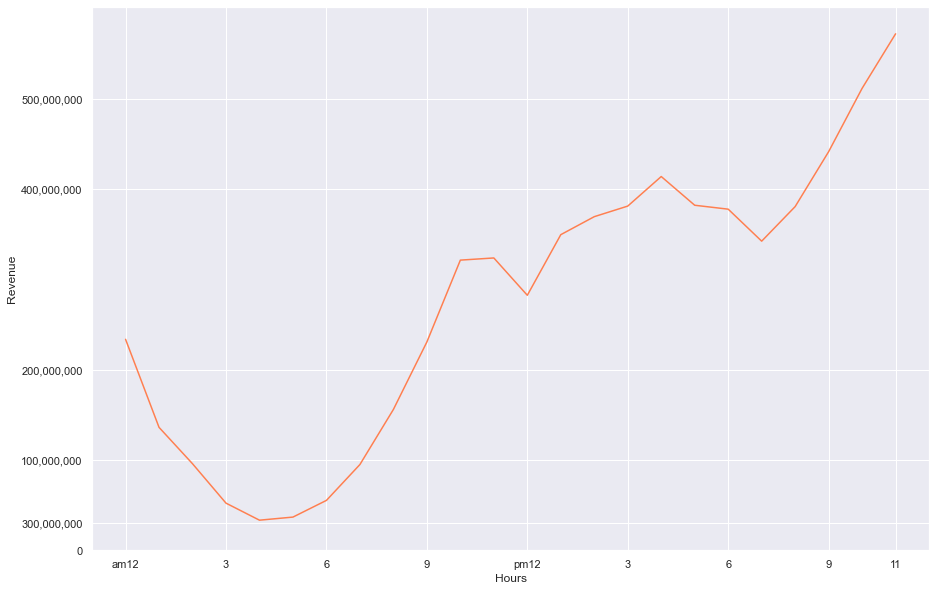

In [147]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_hour,
             color = 'coral'
            )
plt.xlabel('Hours')
plt.ylabel('Revenue')
plt.yticks([0, 100000000, 200000000, 30000000, 400000000 ,500000000], [0, '100,000,000', '200,000,000', '300,000,000', '400,000,000' ,'500,000,000'])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21 ,23], ['am12', '3', '6', '9', 'pm12', '3', '6', '9', '11'])
plt.xlim([-1, 24])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 601732315])     # Y축의 범위: [ymin, ymax]
plt.show()

>  저녁시간대 부터 자정까지 매출비중이 높은것을 알 수 있음.

### 시간대별 매출 Pie Graph

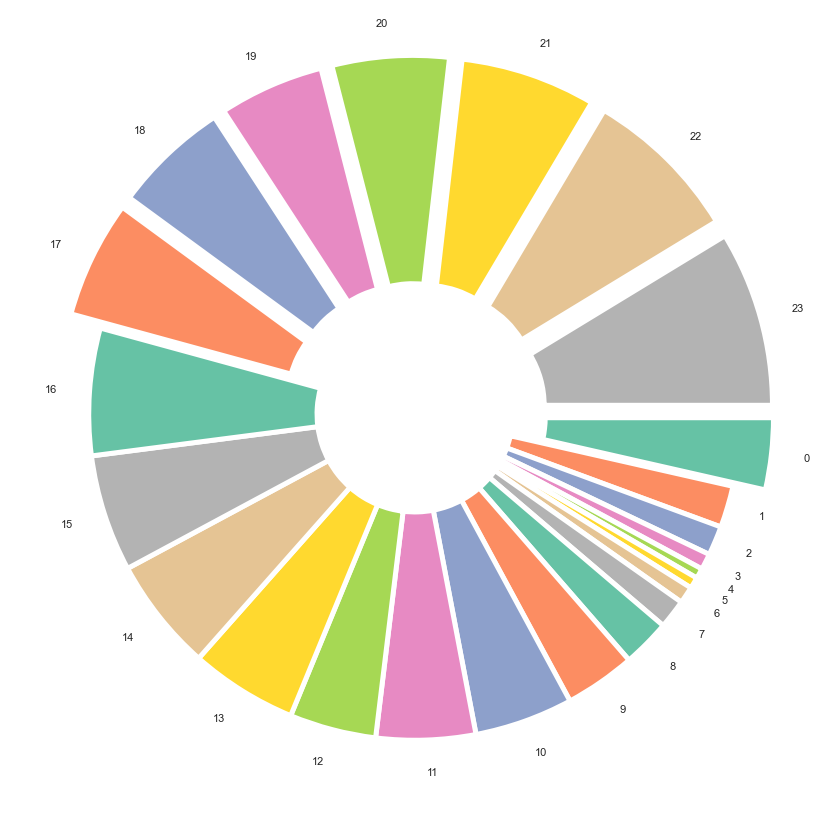

In [142]:
labels = [i for i in range(0,24)]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette("Set2")
explode = [0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]

plt.figure(figsize=(15,15))
plt.pie(rev_by_hour.transaction_amount,
        labels = labels,
        counterclock=False,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       
       
       )
plt.show()

> 파이 차트를 살펴보면 오후 5시부터 자정까지 7시강동안의 매출이 전체매출의 50% 이상을 차지하는것을 알 수 있음.


### 요일별 매출 그래프


In [106]:
# lambda 함수를 이용해 요일만 뽑아서 그룹핑
rev_by_dow = rev.set_index('completed_at').groupby(lambda dow: dow.dayofweek).sum()[['transaction_amount']]
rev_by_dow

,transaction_amount
completed_at,
0,987559800
1,971240810
2,988390705
3,827488595
4,909830890
5,737461545
6,1149664615


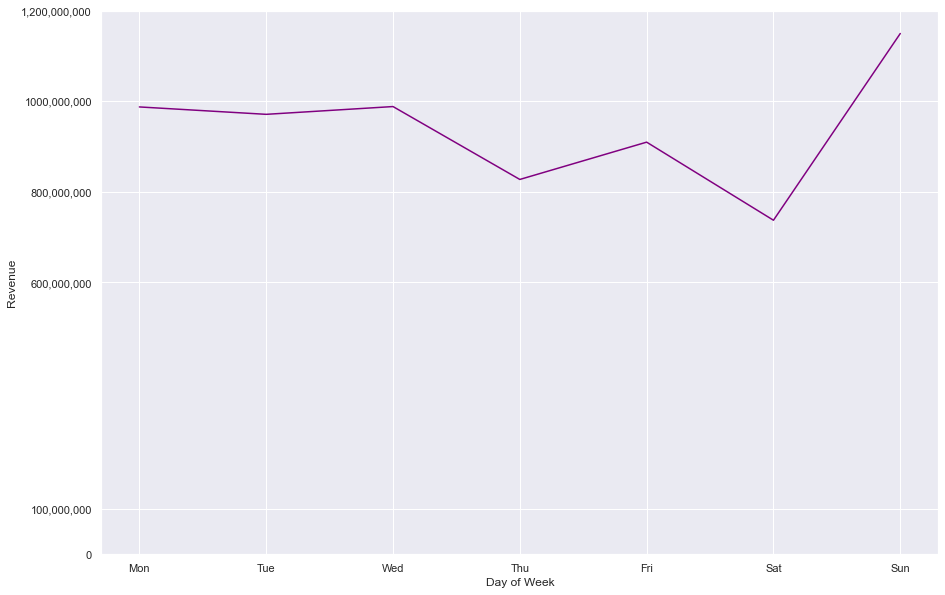

In [151]:
# 시각화

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

sns.lineplot(x='completed_at', y='transaction_amount',
             data=rev_by_dow,
             color = 'purple'
            )
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.yticks([0, 100000000, 600000000, 800000000, 1000000000 ,1200000000], 
           ['0','100,000,000', '600,000,000', '800,000,000', '1000,000,000' ,'1,200,000,000'])
plt.xticks([i for i in range(0,7)], 
           ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# plt.xlim([-1, 24])      # X축의 범위: [xmin, xmax]
# plt.ylim([0, 1200000000])     # Y축의 범위: [ymin, ymax]
plt.show()

> 요일별 매출을 분석해보면 일요일 매출이 가장높고 토요일 매출이 가장낮지만 요일별 편차가 크지 않은것을 알 수 있음.

### 요일별 매출 Pie Graph

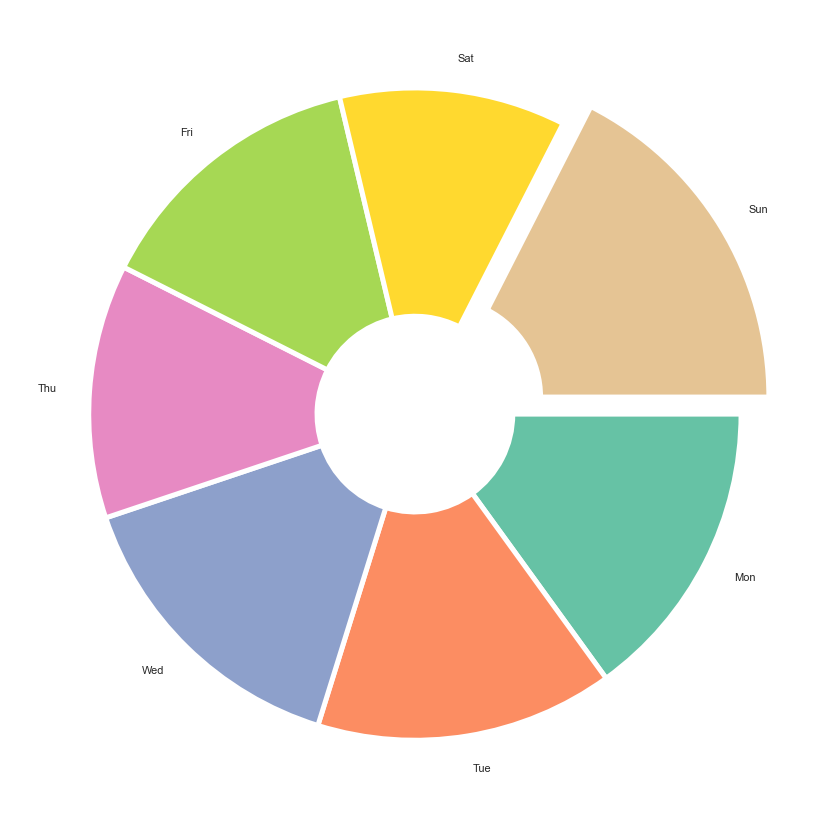

In [140]:
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0, 0, 0, 0, 0, 0, 0.10]
colors = sns.color_palette("Set2")

plt.figure(figsize=(15,15))
plt.pie(rev_by_dow.transaction_amount,
        labels = labels,
        counterclock=False,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors

       
       
       )
plt.show()

> 파이 차트를 이용해 요일별 편차 정도를 좀 더 직관적으로 확인할 수 있음

### 일별 매출 그래프

In [154]:
# lambda 함수를 이용해 일만 뽑아서 그룹핑
rev_by_day = rev.set_index('completed_at').groupby(lambda day: day.).sum()[['transaction_amount']]
rev_by_day

TypeError: You have to supply one of 'by' and 'level'

In [ ]:
pd.datetime

### 주별 매출 그래프

### 월별 매출 그래프

### 분기별 매출 그래프

### 6개월(반기) 총매출 그래프

# 강의 분석

## 전체 강의 수

## 전체 카테고리 수

## 가장많은(적은) 매출을 올린 강의 및 탑 10강의 매출추이

### 매출 상위 1~10위 까지의  강의  목록 

### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 강의목록

### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

## 가장많은(적은) 매출을 올린 카테고리 탑 10카테고리 매출추이

### 매출 상위 1~10위 까지의  카테고리  목록

### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 카테고리목록

### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

# 수강 신청 행동 패턴 분석

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

### 취소가 가장 적은 1~20위 강의 목록

### 환불이 많은  1~20위 까지의  강의  목록(refund)

### 환불률이 가장 적은 1~20위 강의 목록

### 구매률과 환불률의 상관관계

# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

# VIP그룹 분석

## VIP 그룹 정의

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

# 레드는 과연 성공했는가?